In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

In [ ]:
dfu = pd.read_csv('/content/2022_country_daily_2022_US_daily_symptoms_dataset.csv', index_col = 0)
dfu['date'] = pd.to_datetime(dfu['date'])

df_first = dfu.head(n=274)
display(df_first)

,country_region,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,place_id,date,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
country_region_code,,,,,,,,,,,,,,,,,,,,,
US,United States,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2022-01-01,1.97,4.63,7.05,...,1.00,0.23,0.35,2.80,0.29,2.36,0.39,0.15,0.46,0.32
US,United States,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2022-01-02,2.18,4.58,7.58,...,1.06,0.23,0.37,2.99,0.30,2.65,0.41,0.15,0.50,0.32
US,United States,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2022-01-03,2.04,4.45,7.08,...,1.07,0.21,0.40,3.06,0.30,2.43,0.41,0.14,0.47,0.34
US,United States,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2022-01-04,1.97,4.36,7.03,...,1.07,0.22,0.44,3.10,0.29,2.50,0.44,0.15,0.48,0.35
US,United States,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2022-01-05,1.91,4.29,6.91,...,1.08,0.23,0.44,3.06,0.29,2.46,0.44,0.15,0.47,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US,United States,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2022-09-27,1.56,4.11,6.49,...,1.18,0.24,0.41,2.87,0.28,1.91,0.39,0.15,0.46,0.37
US,United States,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2022-09-28,1.48,3.93,6.30,...,1.15,0.23,0.40,2.72,0.27,1.86,0.38,0.15,0.44,0.35
US,United States,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2022-09-29,1.42,3.88,6.47,...,1.13,0.23,0.40,2.65,0.27,1.90,0.37,0.15,0.43,0.34


In [ ]:
dfn = pd.DataFrame()
l=[]

for count, column in enumerate(df_first):    
    # Select column contents by column
    # name using [] operator
    if(count>8):
      columnSeriesObj = df_first[column]
      columnSeriesObj[np.isnan(columnSeriesObj)] = 0
      dfn.insert(count-9, column, columnSeriesObj.tolist(), True)
      l.append(columnSeriesObj.tolist())
      #print('Column Name : ', column)
      #print('Column Contents : ', columnSeriesObj.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe

In [ ]:
dfn.shape

(274, 420)

In [ ]:
X = dfn.values # getting all values as a matrix of dataframe 

In [ ]:
dfn.head(n=4)

,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,symptom:Ageusia,symptom:Alcoholism,symptom:Allergic conjunctivitis,symptom:Allergy,symptom:Amblyopia,symptom:Amenorrhea,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
0,7.05,0.31,0.65,0.08,0.33,5.08,0.05,10.79,0.15,0.09,...,1.00,0.23,0.35,2.80,0.29,2.36,0.39,0.15,0.46,0.32
1,7.58,0.43,0.68,0.08,0.31,4.16,0.05,10.72,0.15,0.10,...,1.06,0.23,0.37,2.99,0.30,2.65,0.41,0.15,0.50,0.32
2,7.08,0.50,0.71,0.09,0.27,3.97,0.05,11.33,0.18,0.11,...,1.07,0.21,0.40,3.06,0.30,2.43,0.41,0.14,0.47,0.34
3,7.03,0.43,0.72,0.09,0.27,3.85,0.05,11.79,0.20,0.12,...,1.07,0.22,0.44,3.10,0.29,2.50,0.44,0.15,0.48,0.35


In [ ]:
X

array([[7.05, 0.31, 0.65, ..., 0.15, 0.46, 0.32],
       [7.58, 0.43, 0.68, ..., 0.15, 0.5 , 0.32],
       [7.08, 0.5 , 0.71, ..., 0.14, 0.47, 0.34],
       ...,
       [6.47, 0.32, 0.42, ..., 0.15, 0.43, 0.34],
       [6.05, 0.29, 0.4 , ..., 0.15, 0.39, 0.33],
       [6.65, 0.28, 0.41, ..., 0.15, 0.41, 0.32]])

In [ ]:
xip = dfn['symptom:Fever']

In [ ]:
xip

0      6.50
1      6.56
2      6.98
3      7.51
4      7.15
       ... 
269    3.81
270    3.65
271    3.55
272    3.42
273    3.51
Name: symptom:Fever, Length: 274, dtype: float64

In [ ]:
np.max(xip)

7.51

In [ ]:
import numpy as np
from sklearn.preprocessing import normalize

xix = xip / np.max(xip)

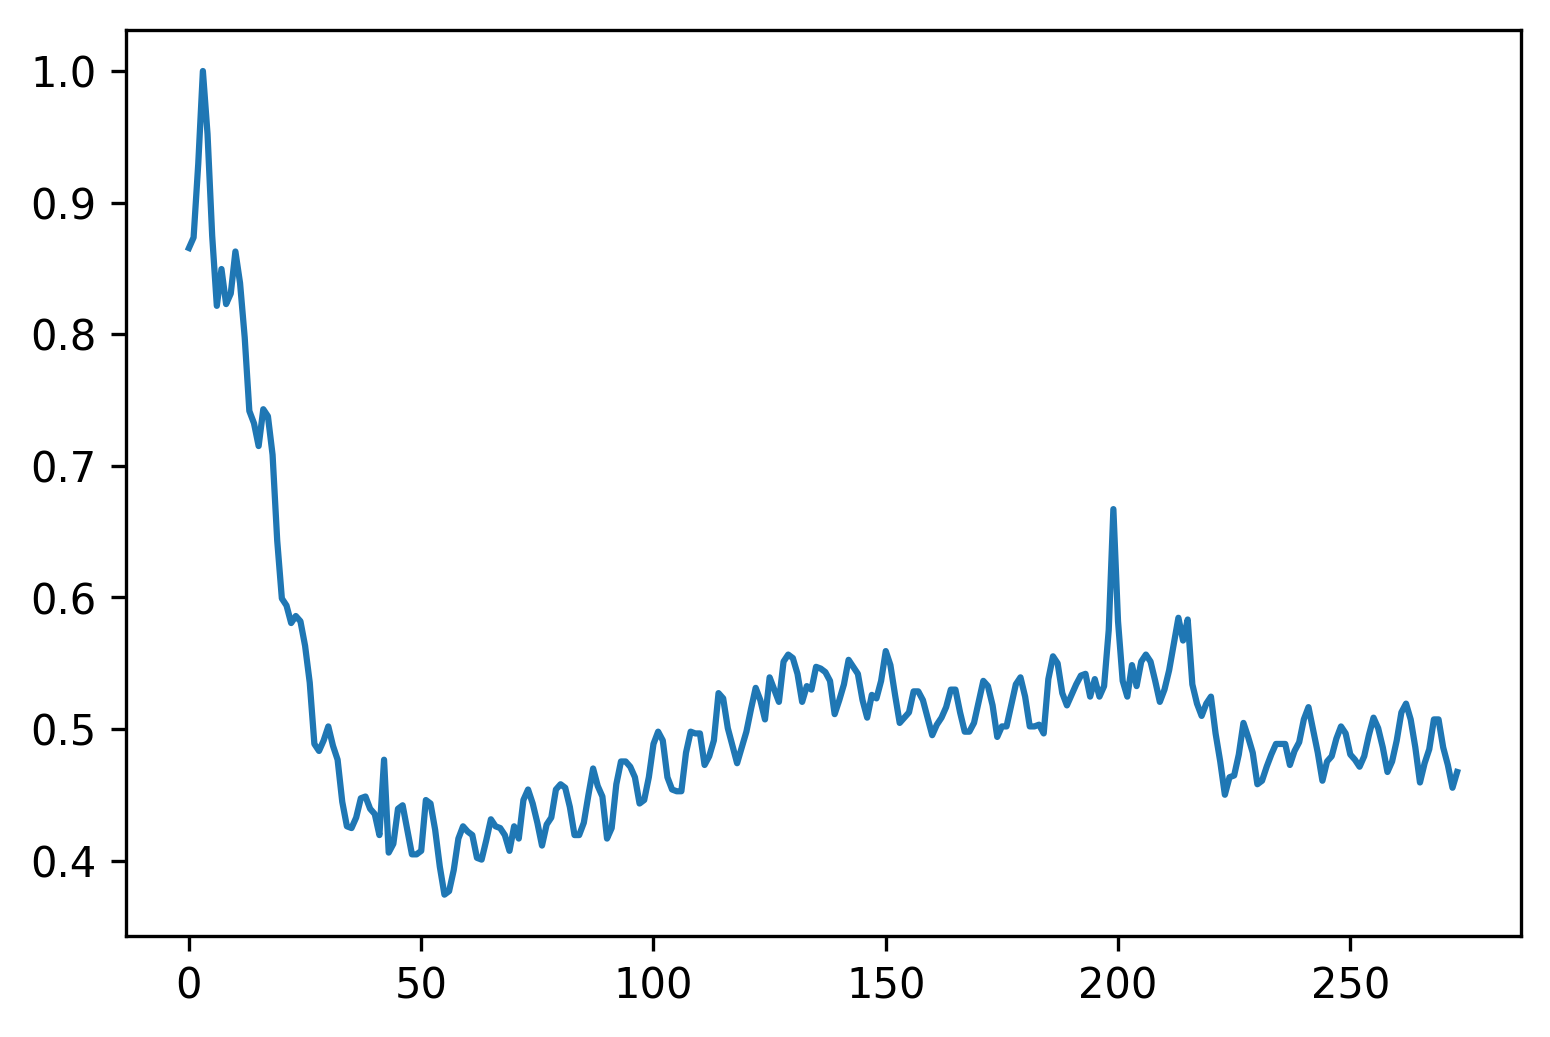

In [ ]:
plt.plot(xix)

In [ ]:
xxx = xix.values

In [ ]:
xxx[0]

0.8655126498002663

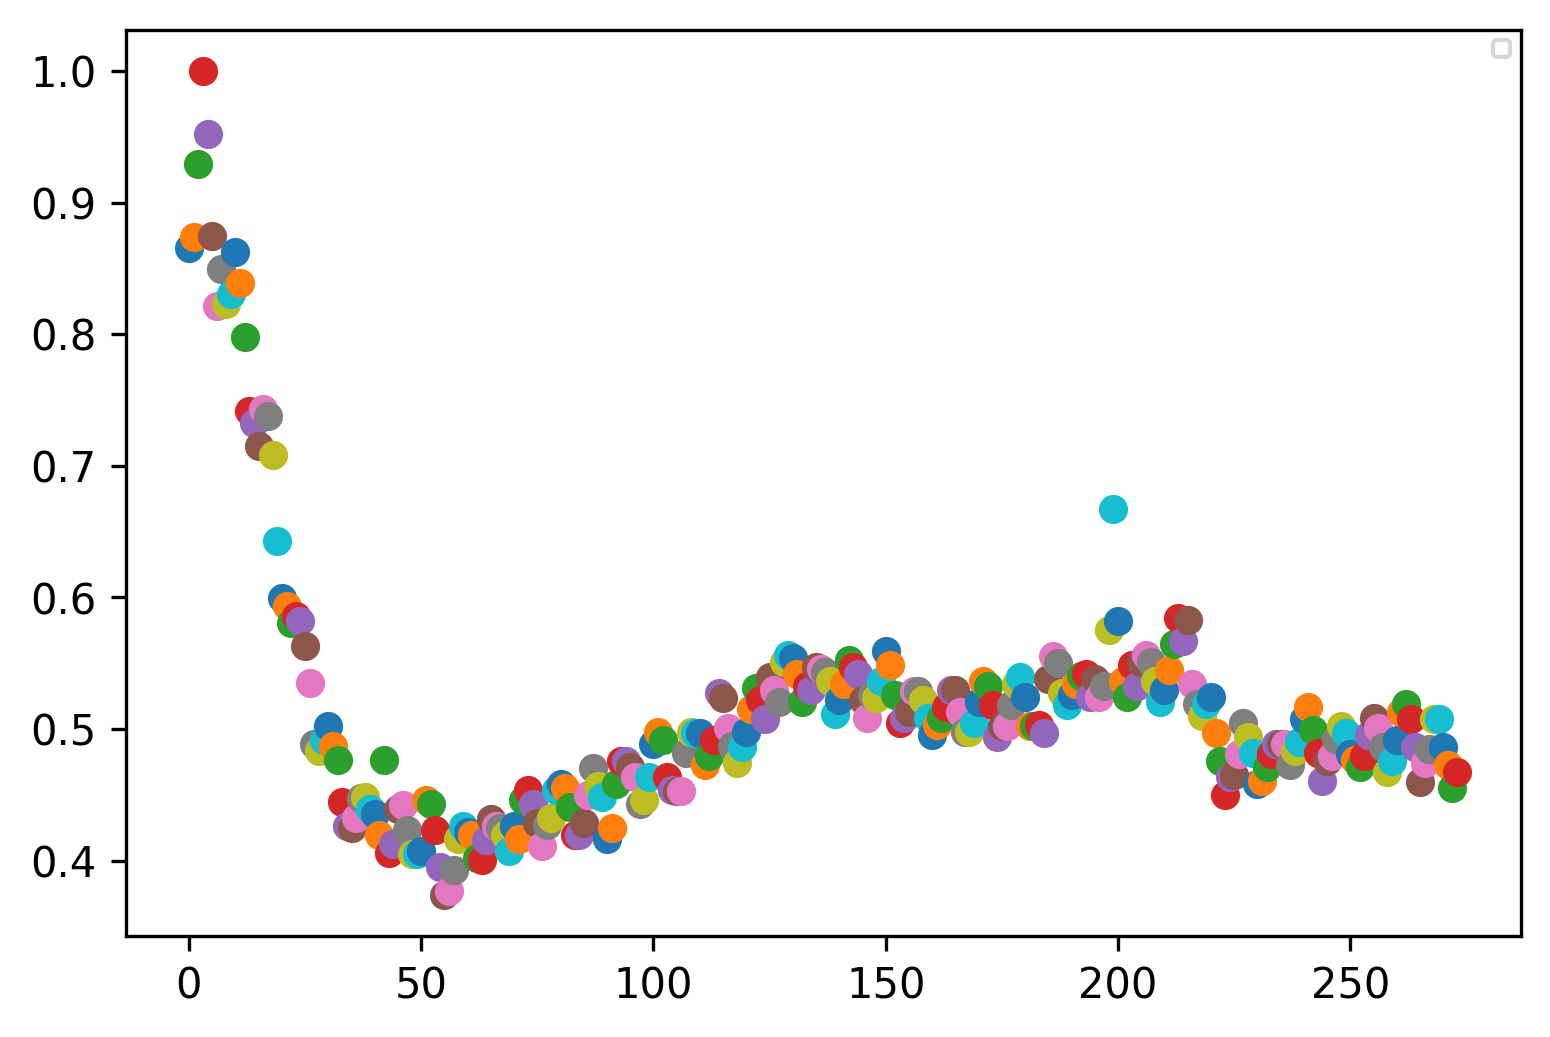

In [ ]:
for i,j in enumerate(xxx):
  plt.scatter(i,j,marker ='o')
 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5}) 
# Show the plot
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

I_d = xxx # from dataset
S_f=[]
I_f=[]
R_f=[]


I0, R0 = 0.8655126498002663, 0.0
S0 = 1 - I0 - R0

params = []

for t in range(40):
  ti = np.linspace(7*(t), 7*(t+1)-1, 7)

  def deriv(y, ti, a,b):
      S, I, R = y
      dSdt = -a * S * I 
      dIdt =  a * S * I  - b * I
      dRdt = b * I
      return dSdt, dIdt, dRdt

  def fn(y):
      # parameters unwrapped
      a,b = y;   
      
      y0 = S0, I0, R0

      ret = odeint(deriv, y0, ti, args= (a,b))
      S, I, R = ret.T
      
      c = I_d[7*(t):7*(t+1)]
      error = sum((I-c)*(I-c))
      return error

  # initialise with current best guess
  init_x = [0.01, 0.05]

  res = minimize(fn, init_x, method='Nelder-Mead', tol=1e-8)

  params.append(res.x)

  y0 = S0, I0, R0
  ret = odeint(deriv, y0, ti, args=(res.x[0],res.x[1]))
  S, I, R = ret.T
  S_f.append(S)
  I_f.append(I)
  R_f.append(R)

  S0, I0, R0 = S[6],I[6],R[6]

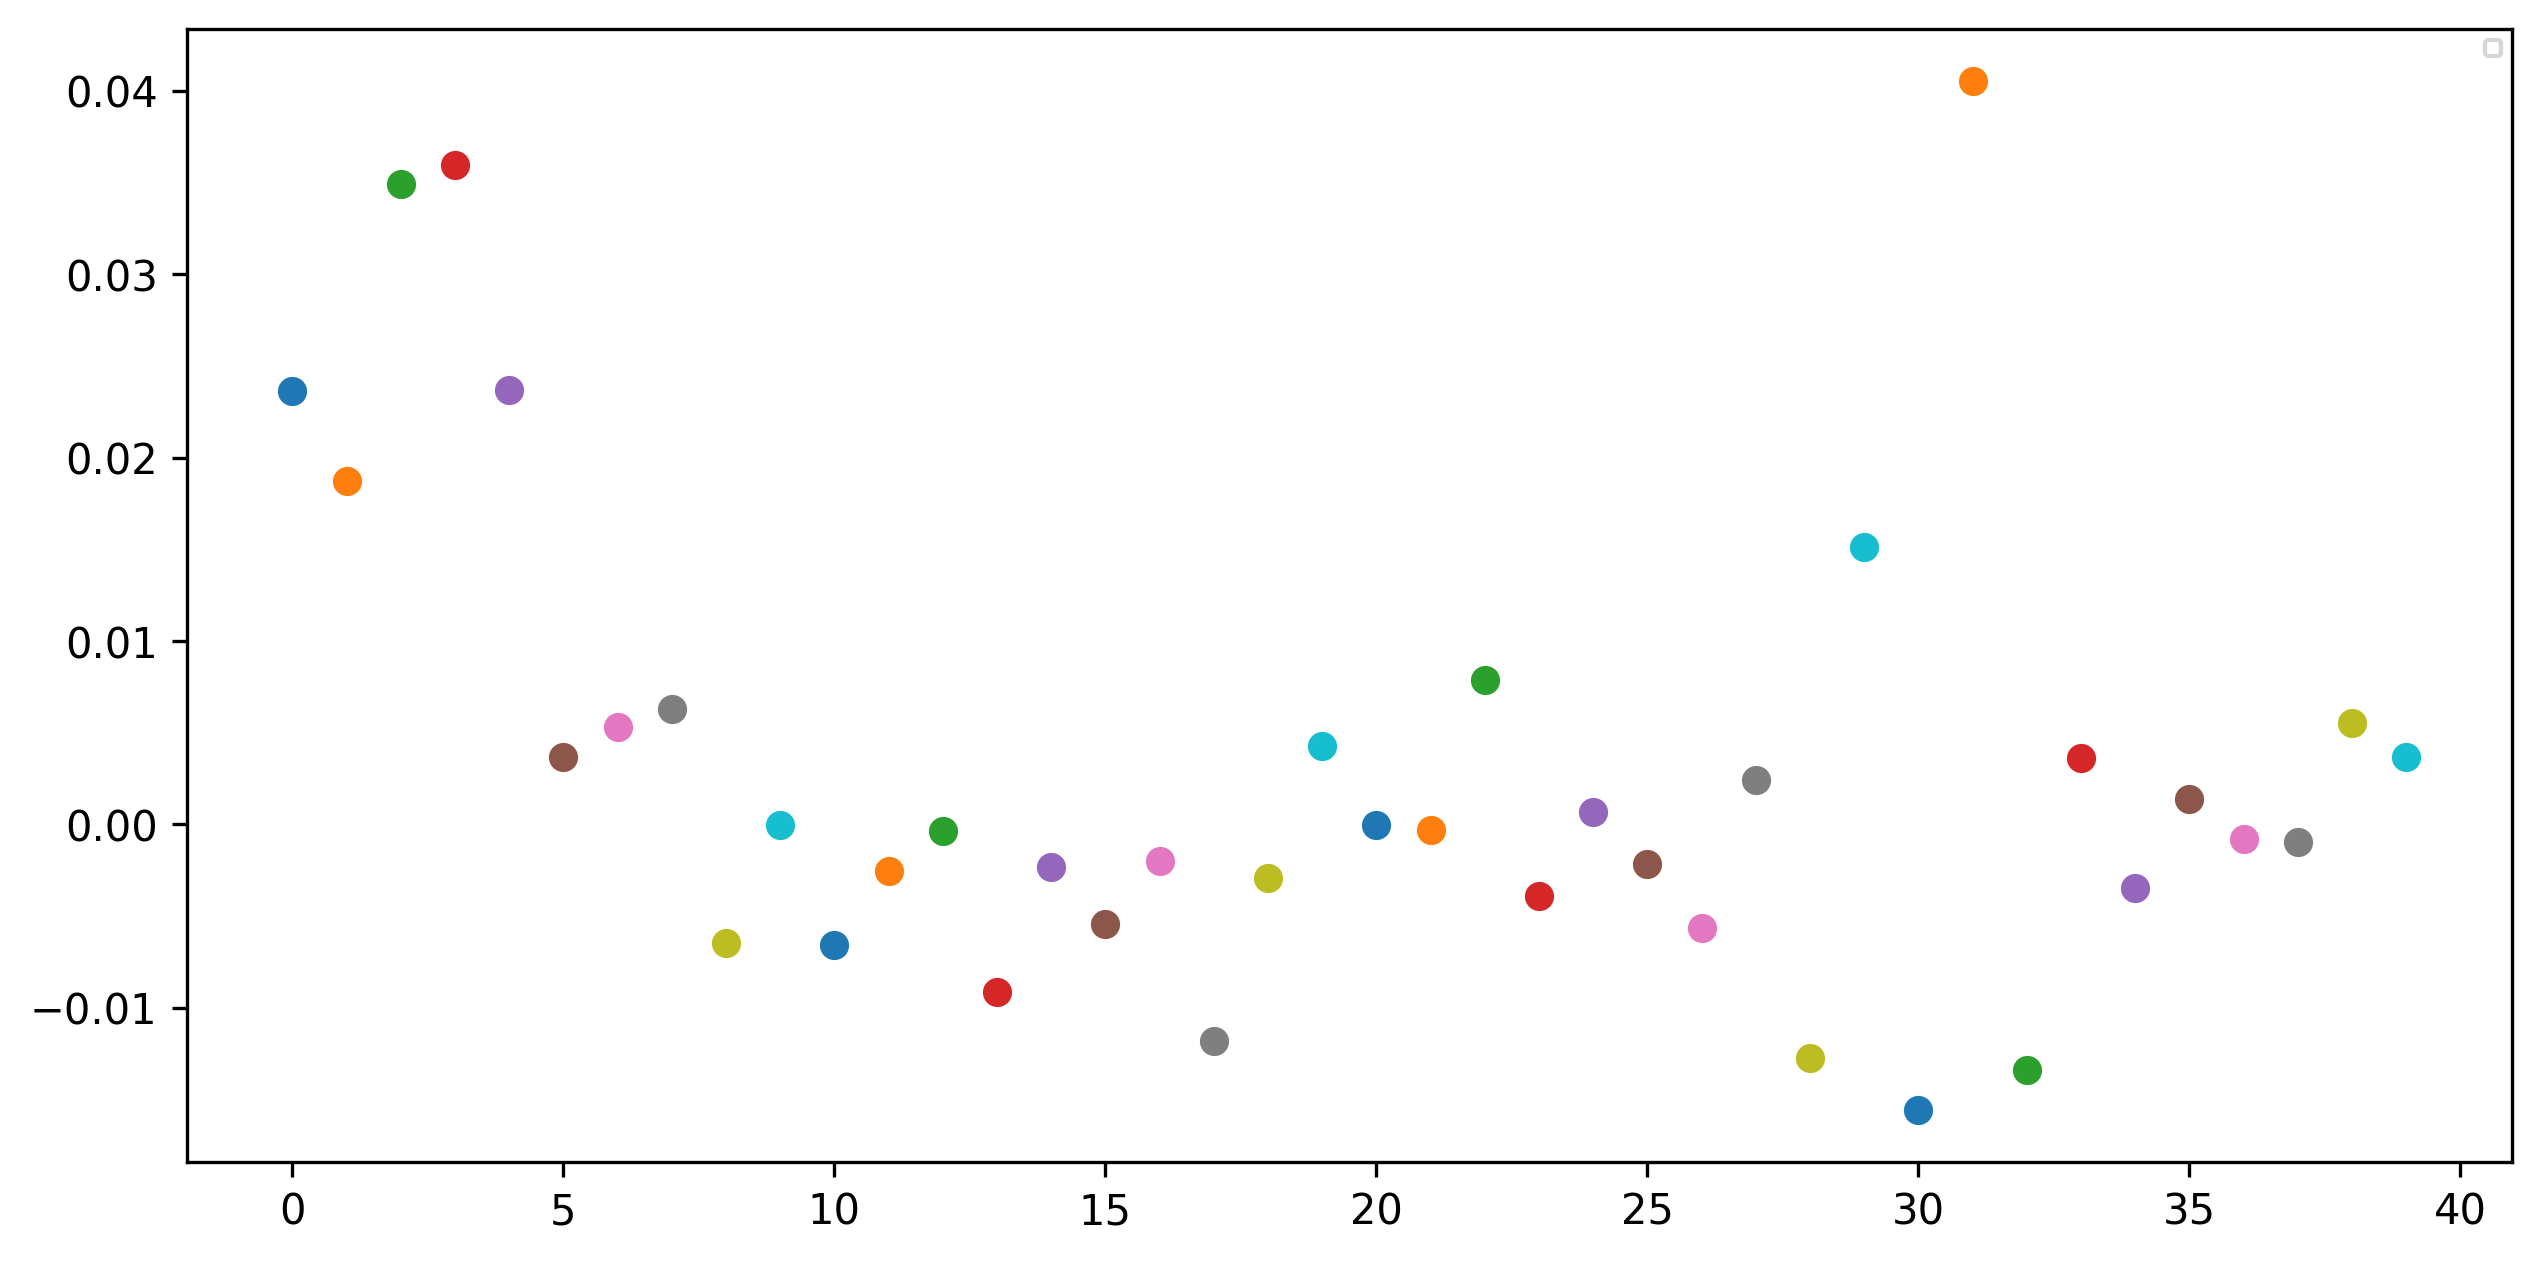

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize = (10, 5))
# Create the plot

for i,j in enumerate(params):
  plt.scatter(i,j[1],marker ='o')
 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5}) 
# Show the plot
plt.show()

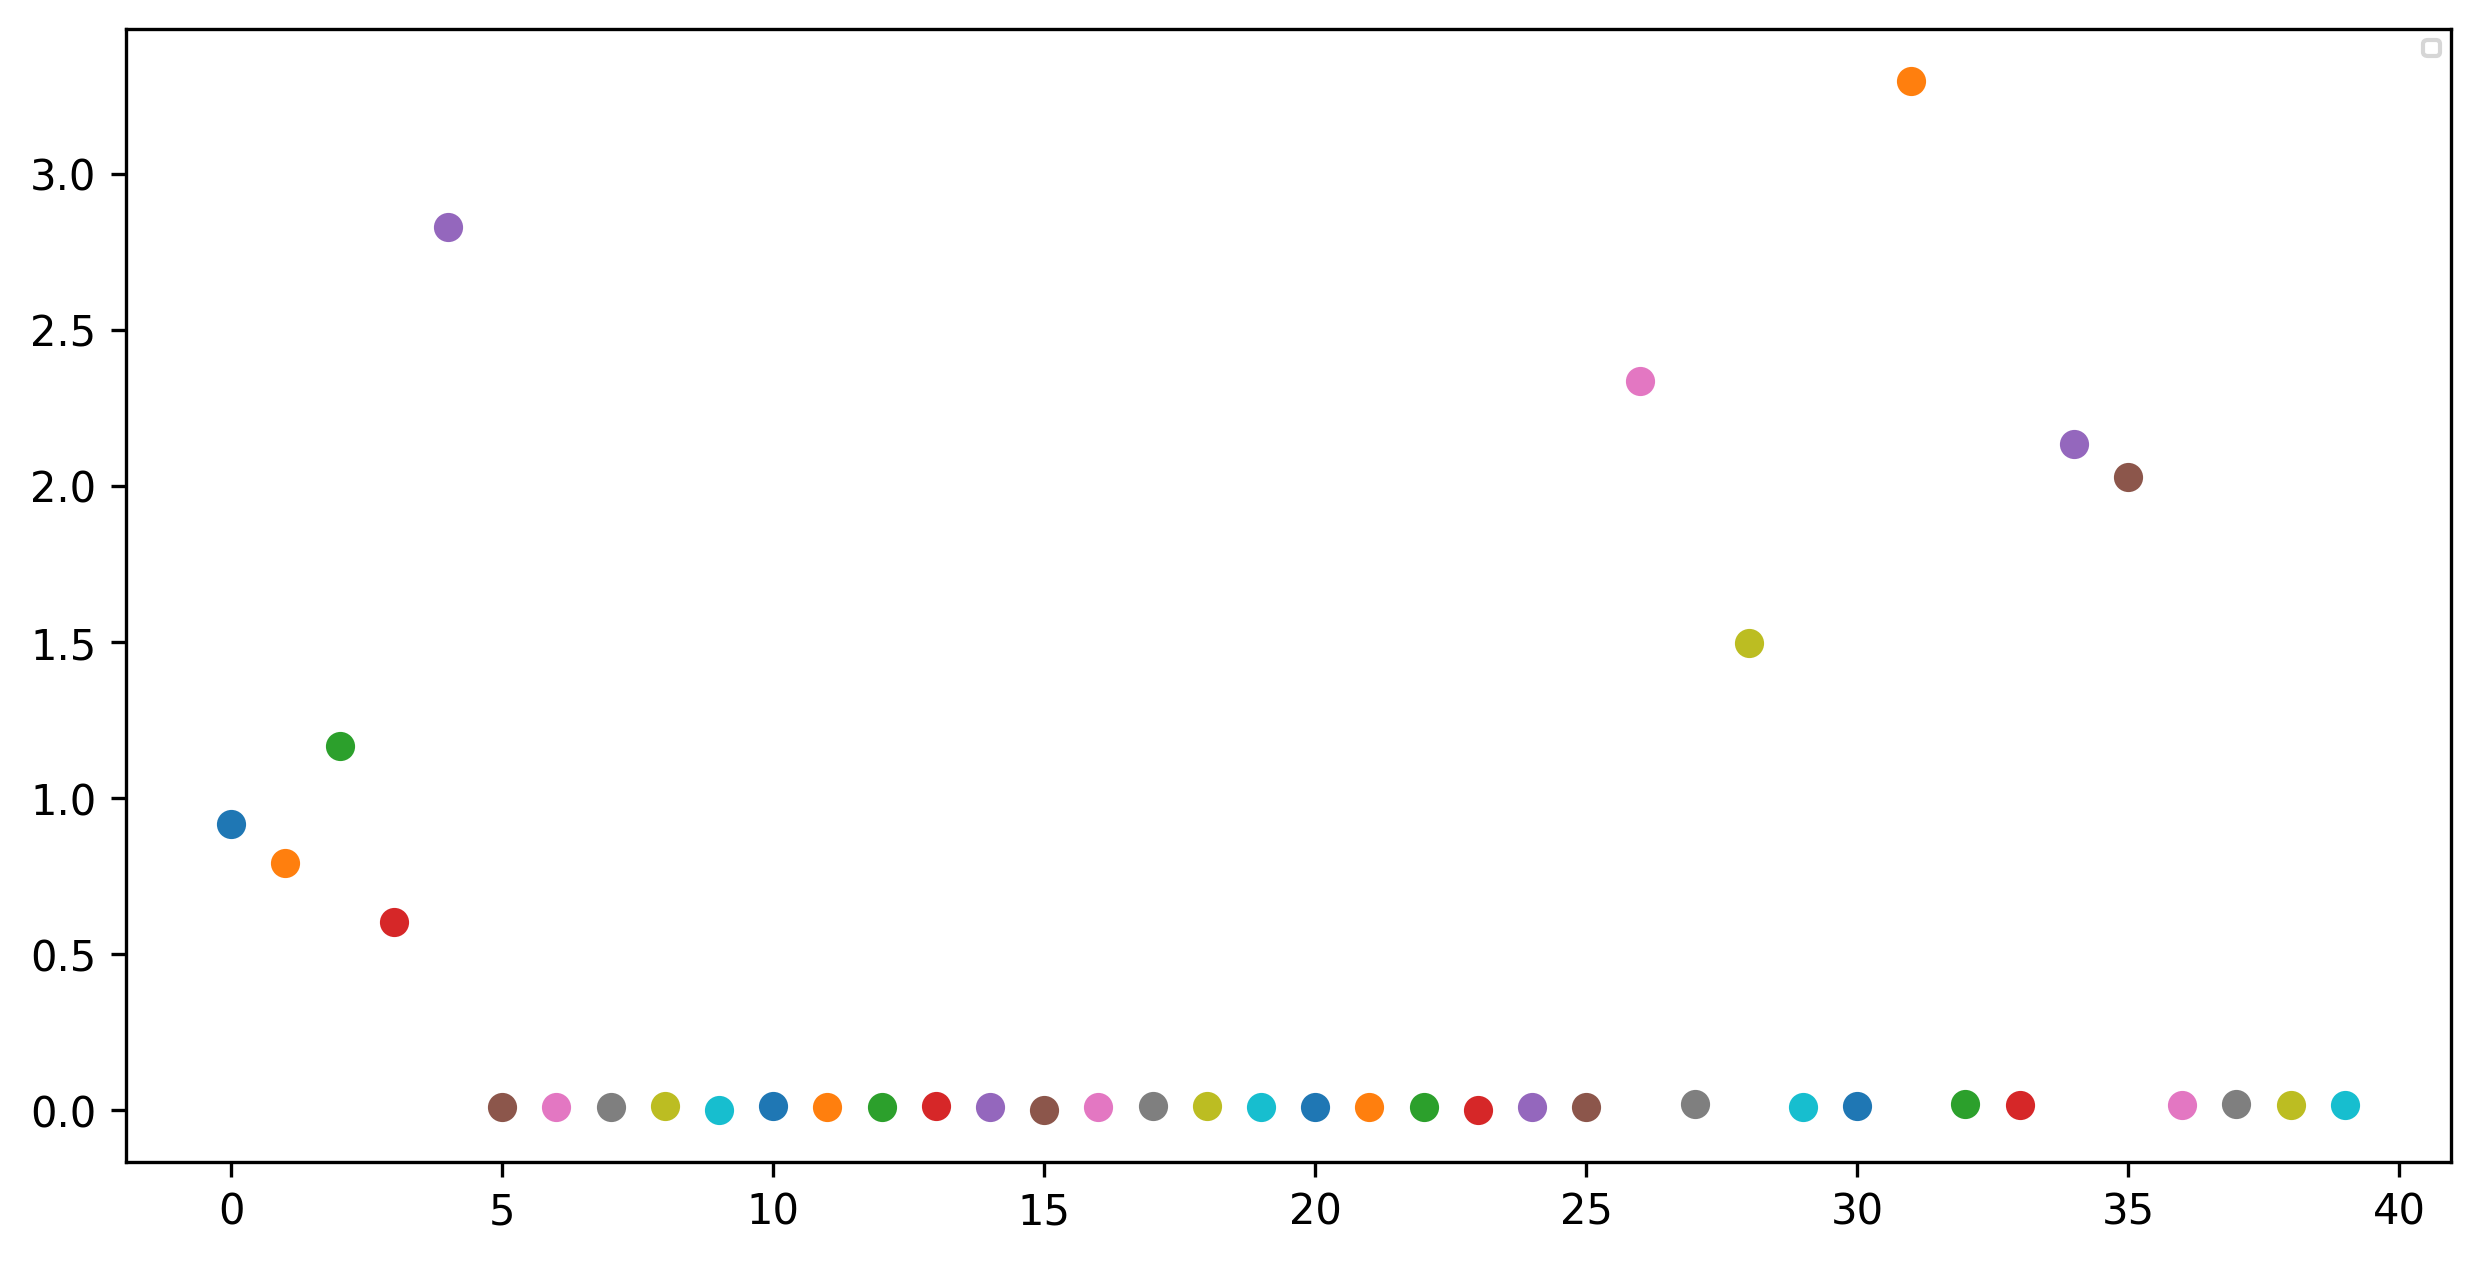

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize = (10, 5))
# Create the plot

for i,j in enumerate(params):
  if j[0]<10:
    plt.scatter(i,j[0],marker ='o')
 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5}) 
# Show the plot
plt.show()

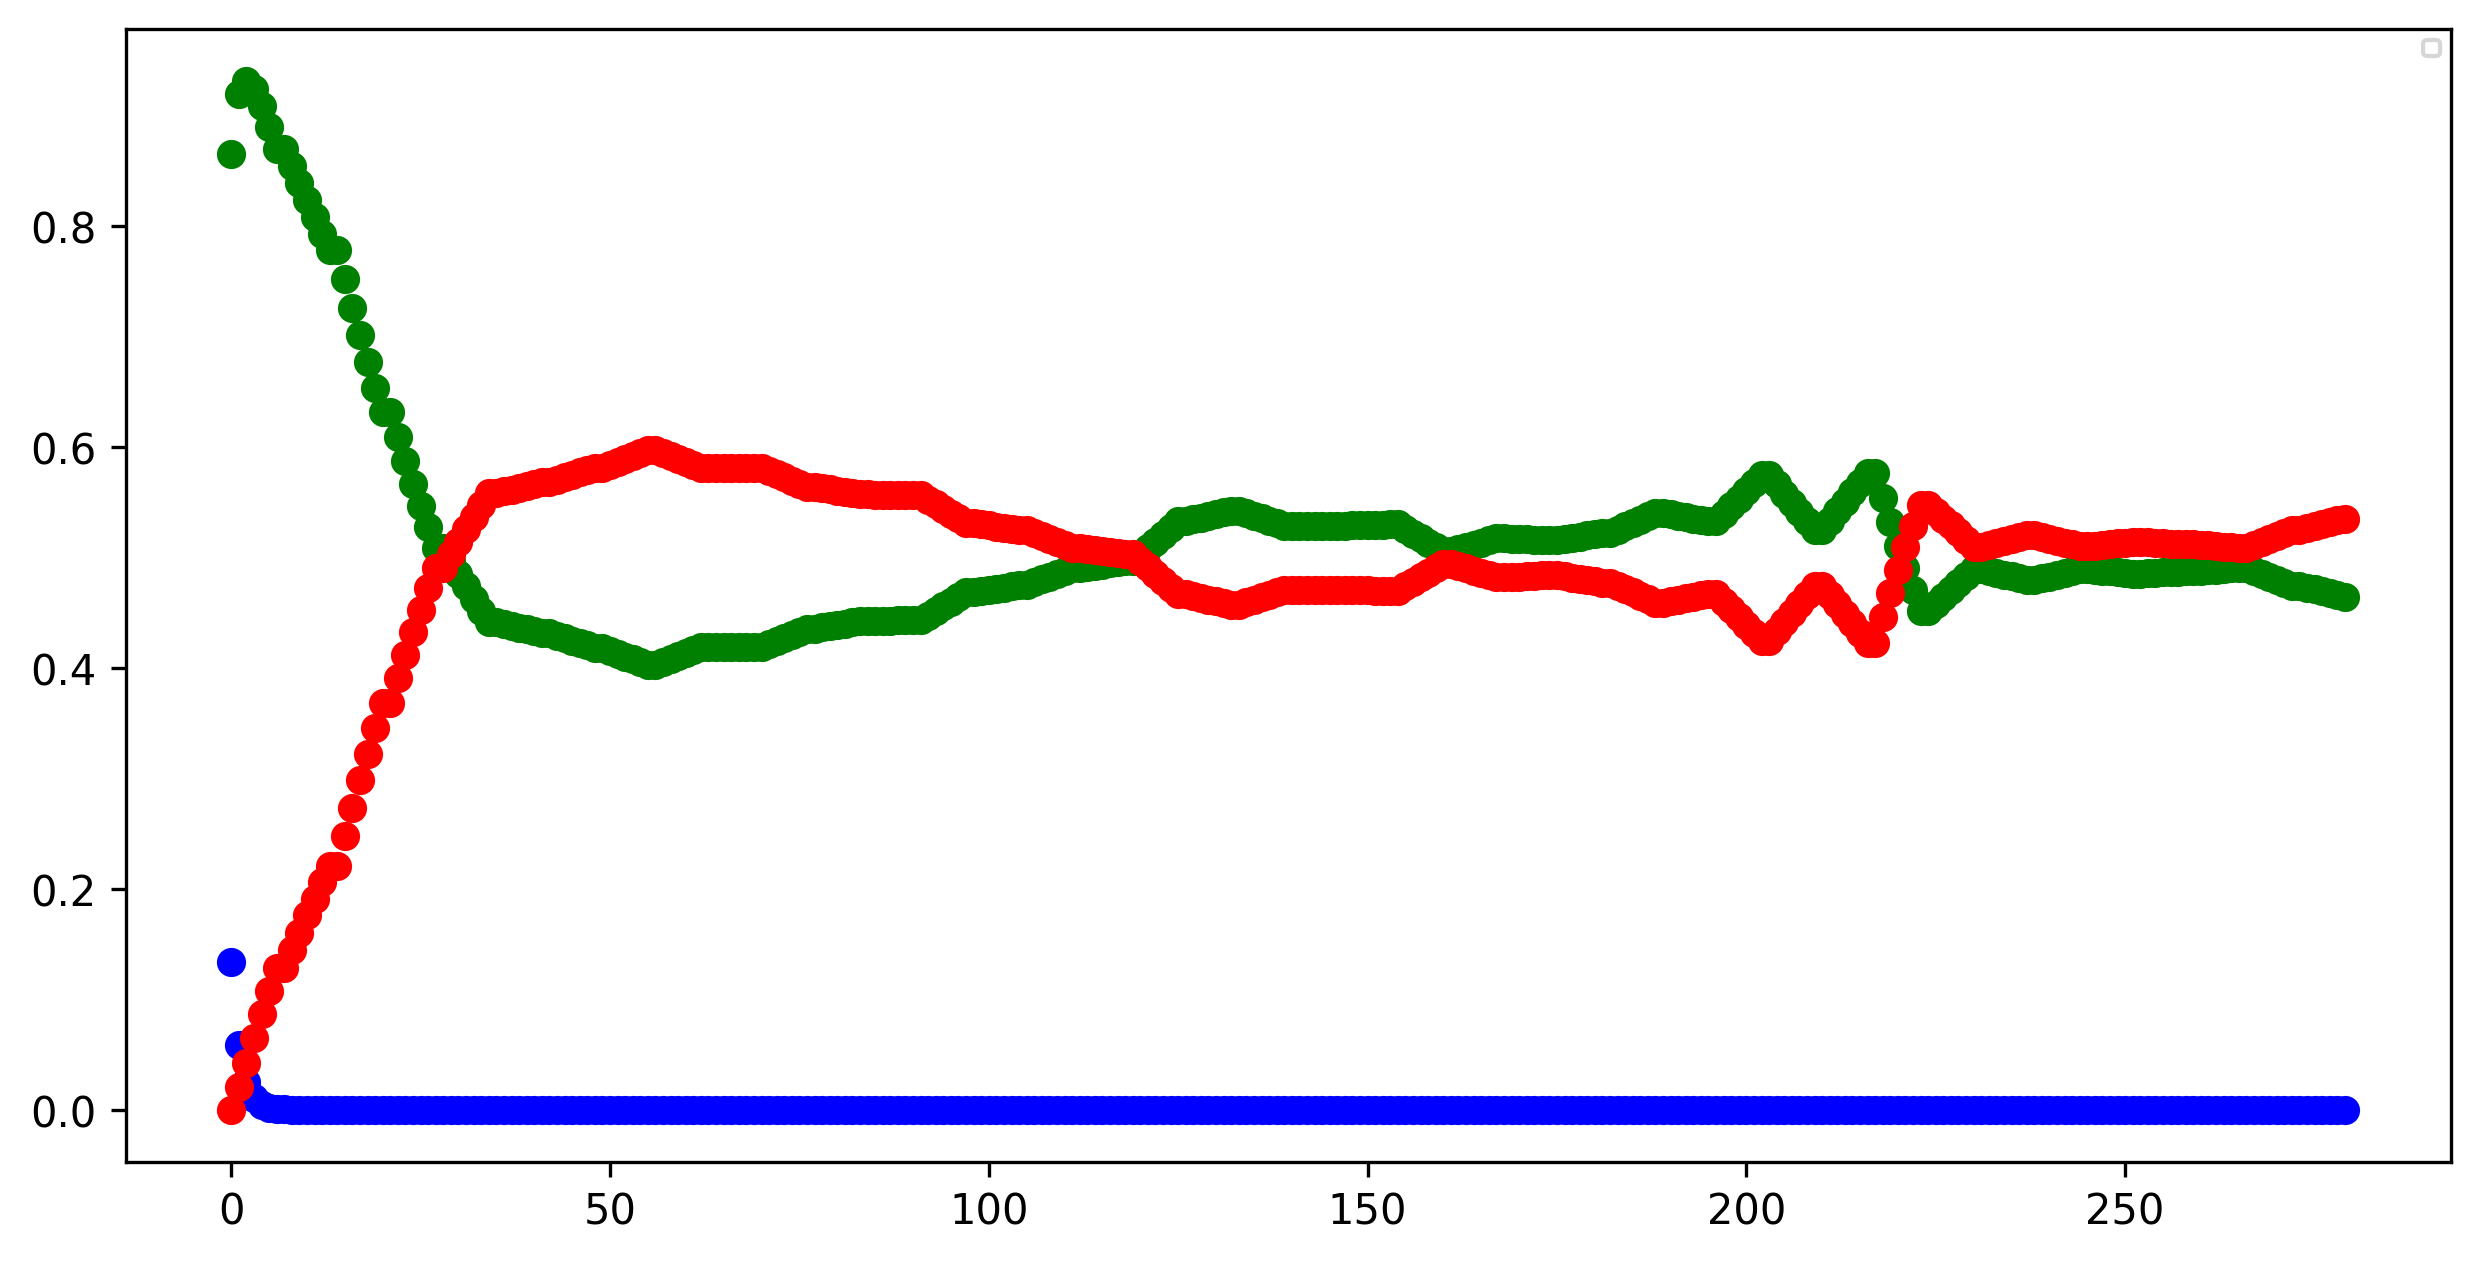

In [ ]:
fig = plt.figure(figsize = (10, 5))
# Create the plot

for p in range(len(S_f)):
  for i,j in enumerate(S_f[p]):
    z=7*p+i
    plt.scatter(z,j, color = 'blue')

for p in range(len(I_f)):
  for i,j in enumerate(I_f[p]):
    z=7*p+i
    plt.scatter(z,j , color = 'green')

for p in range(len(R_f)):
  for i,j in enumerate(R_f[p]):
    z=7*p+i
    plt.scatter(z,j, color = 'red')
 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5}) 
# Show the plot
plt.show()

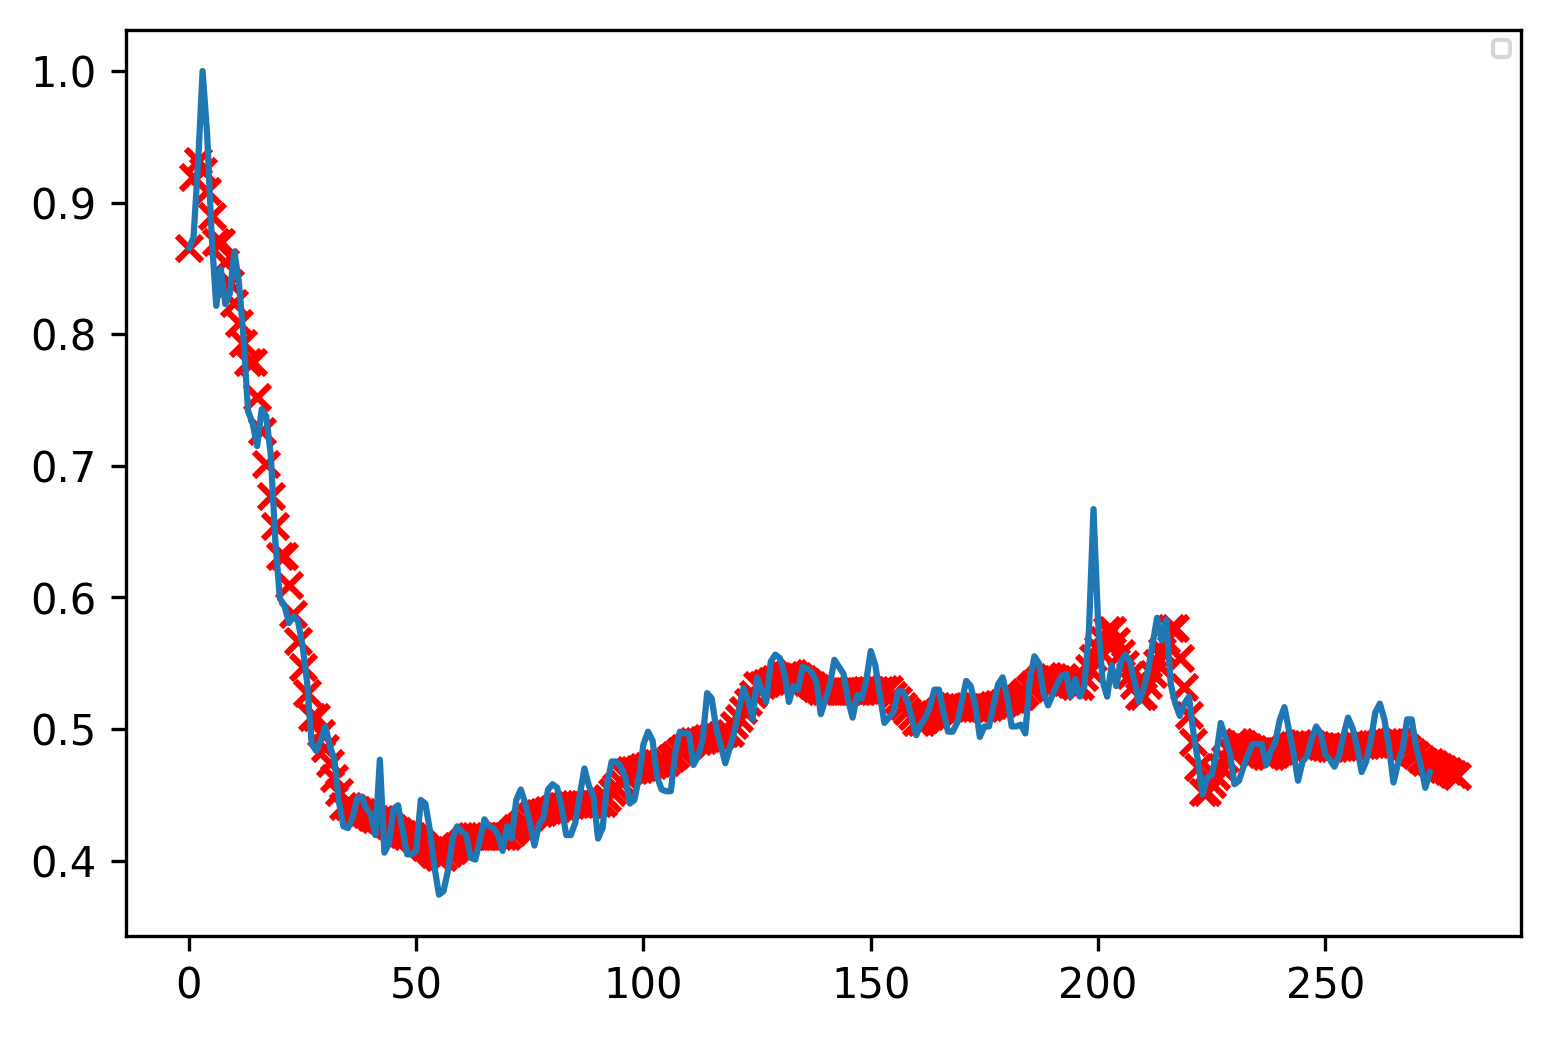

In [ ]:
for p in range(len(I_f)):
  for i,j in enumerate(I_f[p]):
    z=7*p+i
    plt.scatter(z,j , color = 'red', marker = 'x')

plt.plot(xxx)
 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5}) 
# Show the plot
plt.show()